# Diabetes Health Indicators Dataset
253,680 survey responses from cleaned BRFSS 2015 + balanced dataset
## About Dataset
### Context
Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

The scale of this problem is also important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health. Much of the burden of the disease falls on those of lower socioeconomic status as well. Diabetes also places a massive burden on the economy, with diagnosed diabetes costs of roughly $327 billion dollars and total costs with undiagnosed diabetes and prediabetes approaching $400 billion dollars annually.

### Content
The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.

### This dataset contains 3 files:

diabetes _ 012 _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables
diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv is a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.
diabetes _ binary _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.

### Explore some of the following research questions:

* Can survey questions from the BRFSS provide accurate predictions of whether an individual has diabetes?
* What risk factors are most predictive of diabetes risk?
* Can we use a subset of the risk factors to accurately predict whether an individual has diabetes?
* Can we create a short form of questions from the BRFSS using feature selection to accurately predict if someone might have diabetes or is at high risk of diabetes?

### Acknowledgements
It it important to reiterate that I did not create this dataset, it is just a cleaned and consolidated dataset created from the BRFSS 2015 dataset already on Kaggle. That dataset can be found here and the notebook I used for the data cleaning can be found here.

### Inspiration
Zidian Xie et al for Building Risk Prediction Models for Type 2 Diabetes Using Machine Learning Techniques using the 2014 BRFSS was the inspiration for creating this dataset and exploring the BRFSS in general. Link

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings( 'ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

df = pd.read_csv(r"C:\Users\islam\OneDrive\Desktop\Work File\Machine Learning\Supervised ML_Classfication\Diabetes Health Indicators Dataset_Classification\archive (1)\diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

In [2]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


<Axes: >

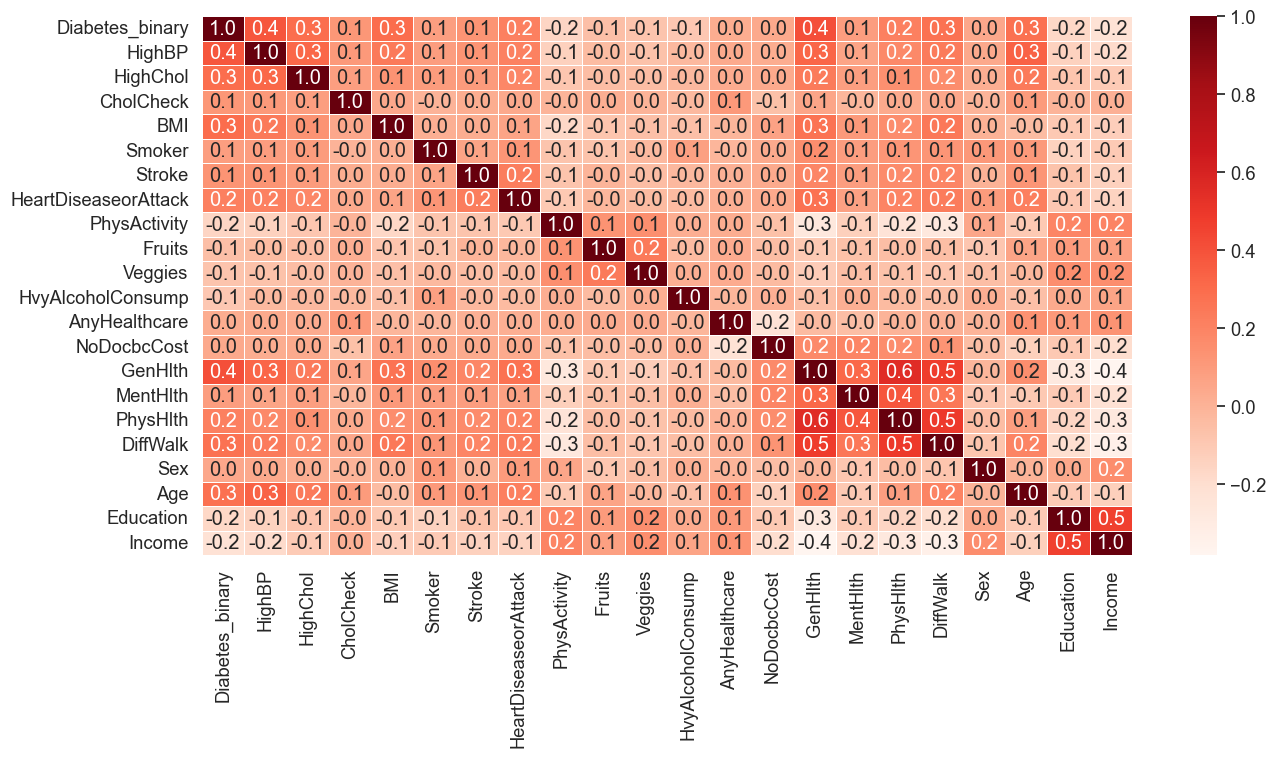

In [5]:
sns.set(rc={'figure.figsize':[15,7]},font_scale=1.2)
sns.heatmap(df.corr(),annot=True,fmt='.1f',linewidths=.5,cmap="Reds")

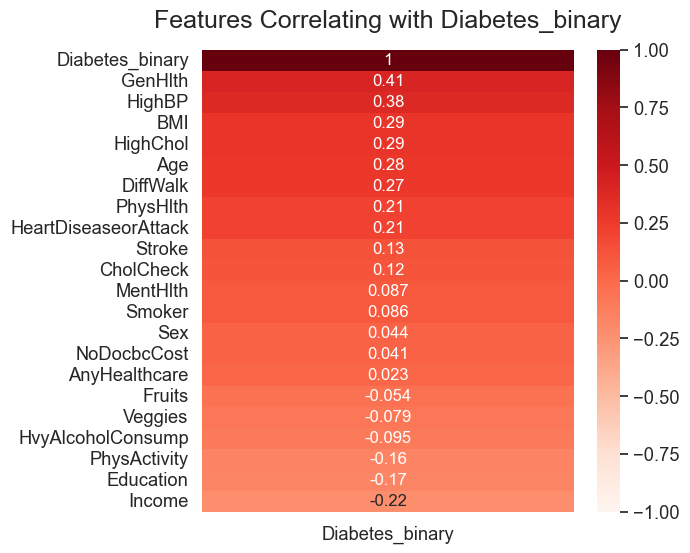

In [6]:
correlation = df.corr()  # Calculate correlations

# Sort features by correlation with 'Exited'
sorted_correlation = correlation[['Diabetes_binary']].sort_values(by='Diabetes_binary', ascending=False)

# Create the heatmap
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(sorted_correlation, vmin=-1, vmax=1, annot=True, cmap='Reds', annot_kws={"fontsize": 12})

# Set title and padding
heatmap.set_title('Features Correlating with Diabetes_binary', fontdict={'fontsize': 18}, pad=16)

# Display the heatmap
plt.show()

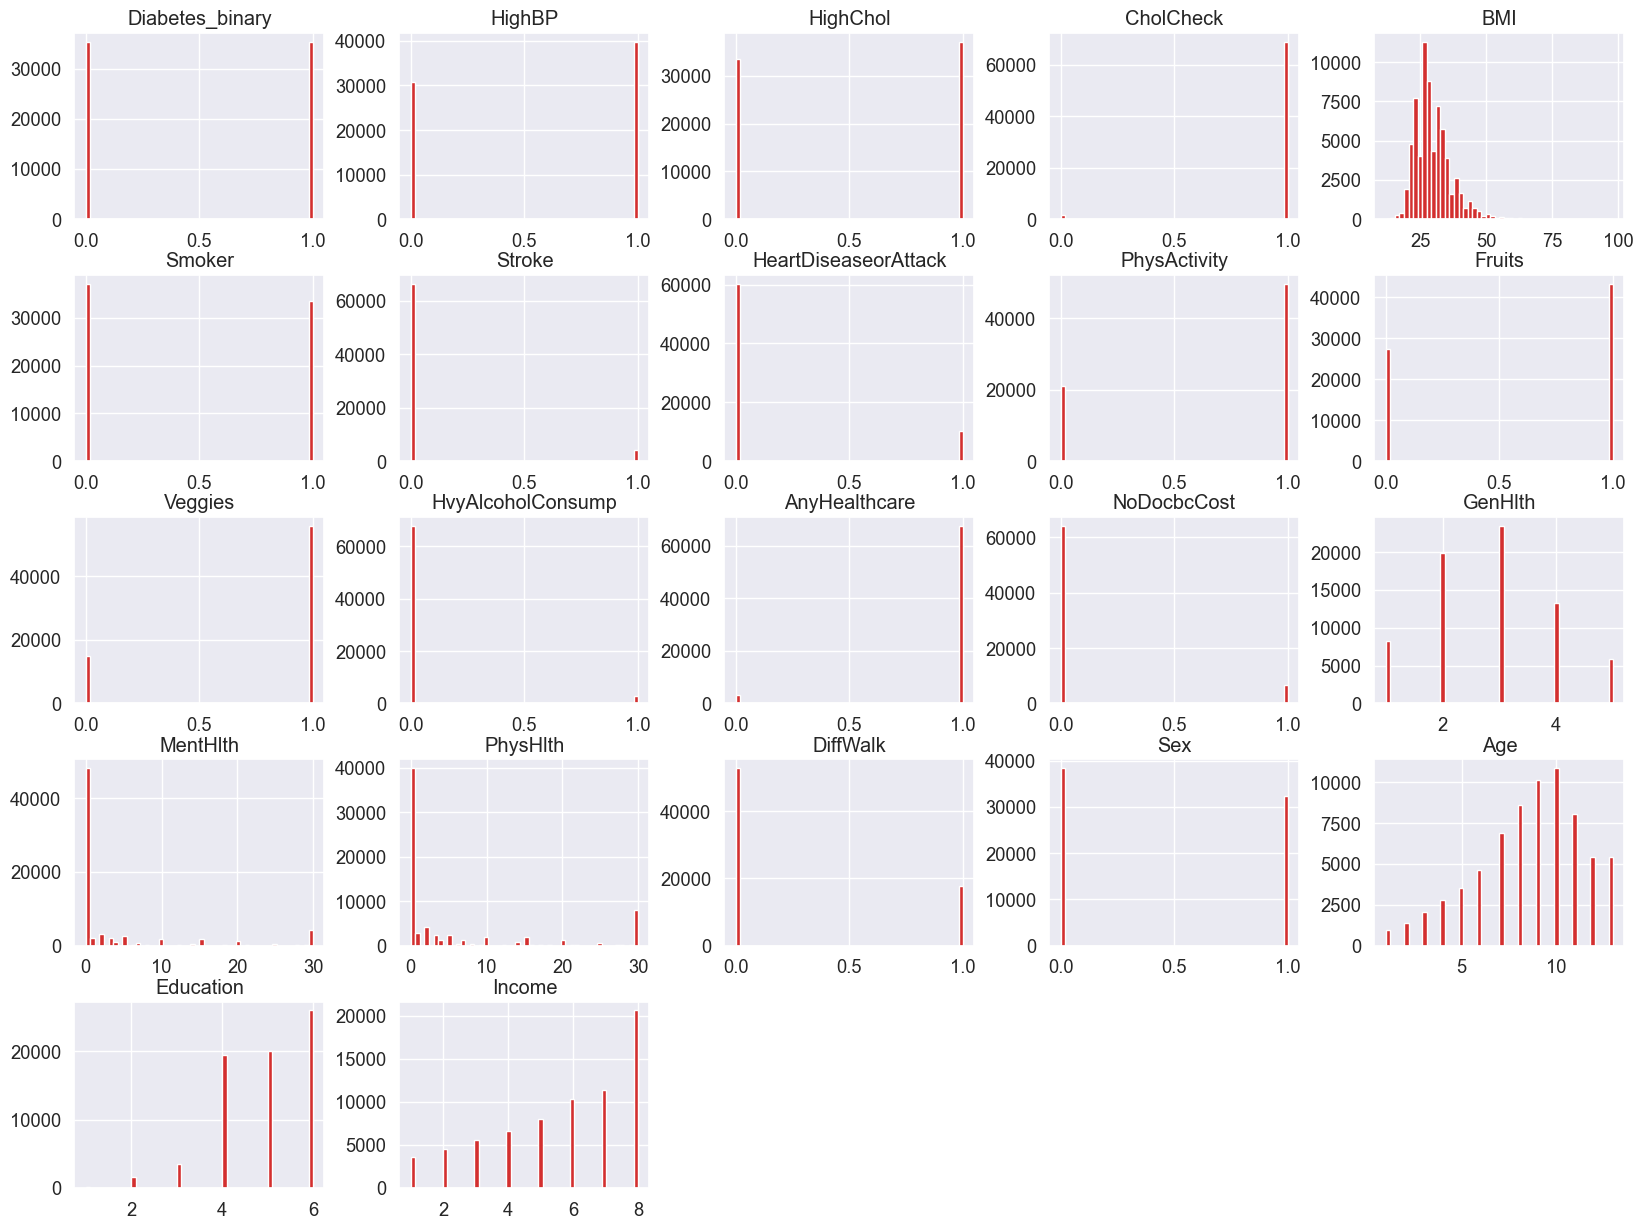

In [7]:
df.hist(bins=50,color='#d32f2f', figsize=(20, 15))
plt.show()

In [8]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
# Proportion of target classes
print("Proportion of Target Classes (Overall dataset):")
print(df['Diabetes_binary'].value_counts(normalize=True),"\n")

#Checking for duplicated rows
print("Duplicate rows:", df.duplicated().sum())

duplicates_df = df[df.duplicated()]
duplicates_df['Diabetes_binary'].value_counts()

Proportion of Target Classes (Overall dataset):
Diabetes_binary
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64 

Duplicate rows: 1635


Diabetes_binary
0.0    1386
1.0     249
Name: count, dtype: int64

In [10]:
#Drop duplicate rows
df.drop_duplicates(inplace = True)
df.shape

(69057, 22)

# Creat The Models

In [11]:
#create the Model 
x=df.drop(['Diabetes_binary'],axis=1)
y=df.Diabetes_binary

In [12]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.1, random_state=40,shuffle=True)
print(x.shape,X_train.shape,X_test.shape)

(69057, 21) (62151, 21) (6906, 21)


In [13]:
# 1- SVC
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

model =SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [14]:
from sklearn import svm, metrics
clf  =  svm.LinearSVC(max_iter=5000)
scores = cross_val_score(clf, x, y,cv=5)

print(f"The accuracy of this model is {scores.mean() :.2f}")

The accuracy of this model is 0.74


In [15]:
# 2-xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy of this model is: {accuracy:.2f}')

The accuracy of this model is: 0.74


In [16]:
# 3-Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, x, y,cv=5)
print(f"The accuracy of this model is {scores.mean() :.2f}")

The accuracy of this model is 0.71


In [17]:
# 4-Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, x, y,cv=5)

print(f"The accuracy of this model is {scores.mean() :.2f}")

The accuracy of this model is 0.65


In [18]:
# 5- GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
scores = cross_val_score(clf, x, y,cv=5)
print(f"The accuracy of this model is {scores.mean() :.2f}")

The accuracy of this model is 0.75


In [19]:
# 6-LogisticRegression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
scores = cross_val_score(clf,x,y,cv=5)
print(f"The accuracy of this model is {scores.mean() :.2f}")

The accuracy of this model is 0.74


In [20]:
# 7-KNN
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
scores = cross_val_score(clf, x, y,cv=5)
print(f"The accuracy of this model is {scores.mean() :.2f}")

The accuracy of this model is nan


# Comparing The models

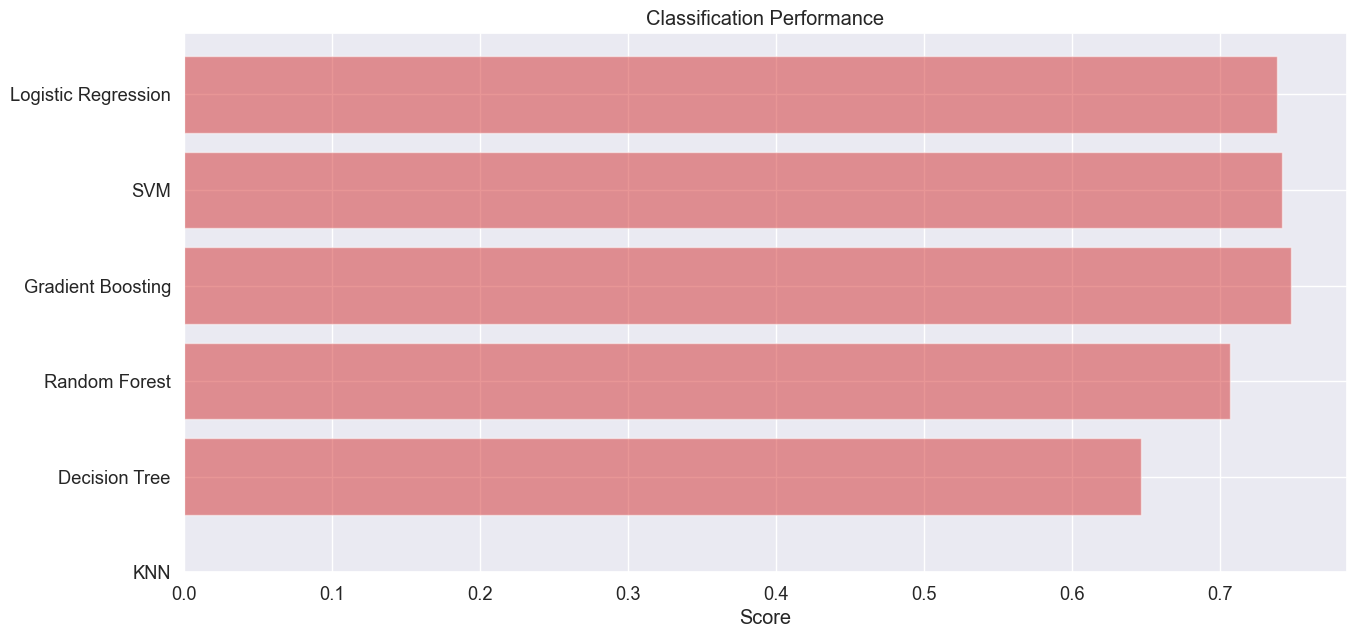

In [21]:
model_names = ["KNN" , "Decision Tree" ,"Random Forest" ,"Gradient Boosting" ,"SVM","Logistic Regression" ]
models = [KNeighborsClassifier() ,DecisionTreeClassifier(),RandomForestClassifier(n_estimators=10) ,   GradientBoostingClassifier() ,svm.LinearSVC(max_iter=5000),LogisticRegression()]
score = []
for i in model_names :
    clf = models[model_names.index(i)]
    scores = cross_val_score(clf, x, y,cv=5)
    score.append(scores.mean())
    
plt.barh(range(len(model_names)), score, align='center', alpha=0.5,color='#d32f2f')
plt.yticks(range(len(model_names)), model_names)
plt.xlabel('Score')
plt.title('Classification Performance')
plt.show()

In [22]:
#Culculated by manually
from sklearn.metrics import confusion_matrix
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
#Calculation
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]

calc_accuracy = (TP+TN)/(TP+TN+FP+FN)
calc_precision = (TP)/(TP+FP)
calc_recall = (TP)/(TP+FN)
print("Calculated accuracy = ", calc_accuracy)
print("Calculated precision = ", calc_precision)
print("Calculated recall = ", calc_recall)

Calculated accuracy =  0.7386330726904141
Calculated precision =  0.6970153753391619
Calculated recall =  0.7429305912596401


TN=2312, FP=1005, FN=800, TP=2789
[[2312  800]
 [1005 2789]]
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      3112
           1       0.78      0.74      0.76      3794

    accuracy                           0.74      6906
   macro avg       0.74      0.74      0.74      6906
weighted avg       0.74      0.74      0.74      6906



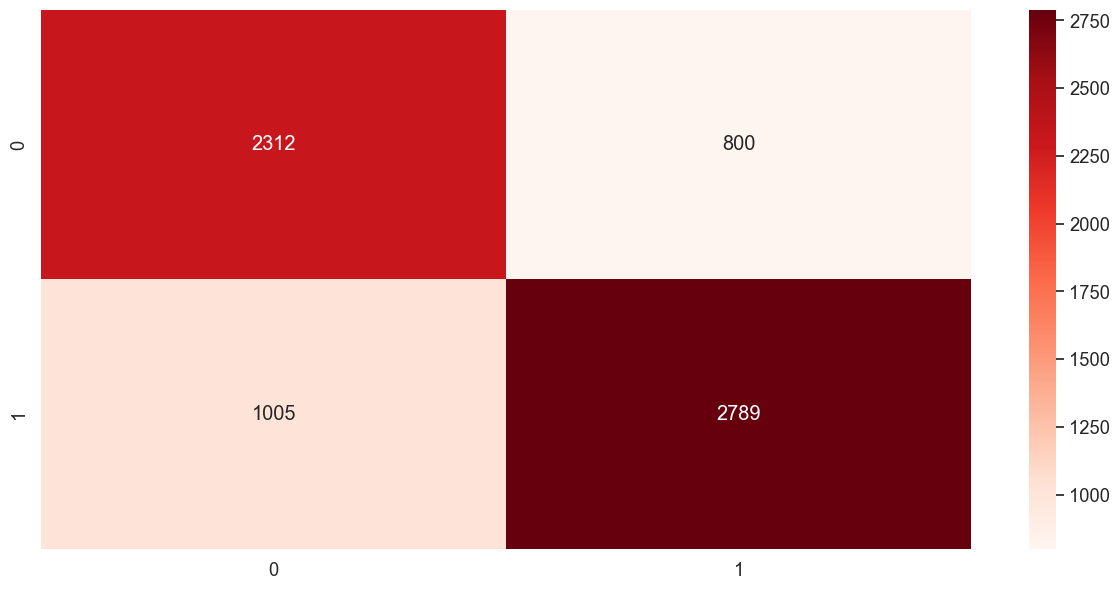

In [23]:
cm = metrics.confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP,FN, TP))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='.0f',cmap="Reds")
plt.show()